In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [41]:
df = pd.read_csv('clinic-data.csv')
df.head()

,x,y,client_age,clinick_distance,density_area,park_distance,vulnerable_group_density,social_infrastructure_rating
0,52.768865,30.466943,12,1,28,52,3,8
1,55.598649,14.103713,37,1,24,16,8,7
2,61.461549,27.727829,31,3,13,59,3,8
3,51.210678,9.913478,56,1,16,29,6,4
4,62.070864,15.297742,90,3,32,90,9,5


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42006 entries, 0 to 42005
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   x                             42006 non-null  float64
 1   y                             42006 non-null  float64
 2   client_age                    42006 non-null  int64  
 3   clinick_distance              42006 non-null  int64  
 4   density_area                  42006 non-null  int64  
 5   park_distance                 42006 non-null  int64  
 6   vulnerable_group_density      42006 non-null  int64  
 7   social_infrastructure_rating  42006 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.6 MB


In [43]:
df.describe()

,x,y,client_age,clinick_distance,density_area,park_distance,vulnerable_group_density,social_infrastructure_rating
count,42006.000000,42006.000000,42006.000000,42006.000000,42006.000000,42006.000000,42006.000000,42006.000000
mean,53.546045,22.948325,47.793601,1.995025,24.995882,49.805004,5.007951,5.000000
std,9.456457,13.765727,27.410523,0.817526,14.166947,28.539766,2.577181,2.593639
min,16.913847,-9.869092,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,47.875448,12.595649,24.000000,1.000000,13.000000,25.000000,3.000000,3.000000
50%,54.400359,22.799480,48.000000,2.000000,25.000000,50.000000,5.000000,5.000000
75%,60.402441,31.868381,71.000000,3.000000,37.000000,74.000000,7.000000,7.000000
max,73.576996,80.597371,95.000000,3.000000,49.000000,99.000000,9.000000,9.000000


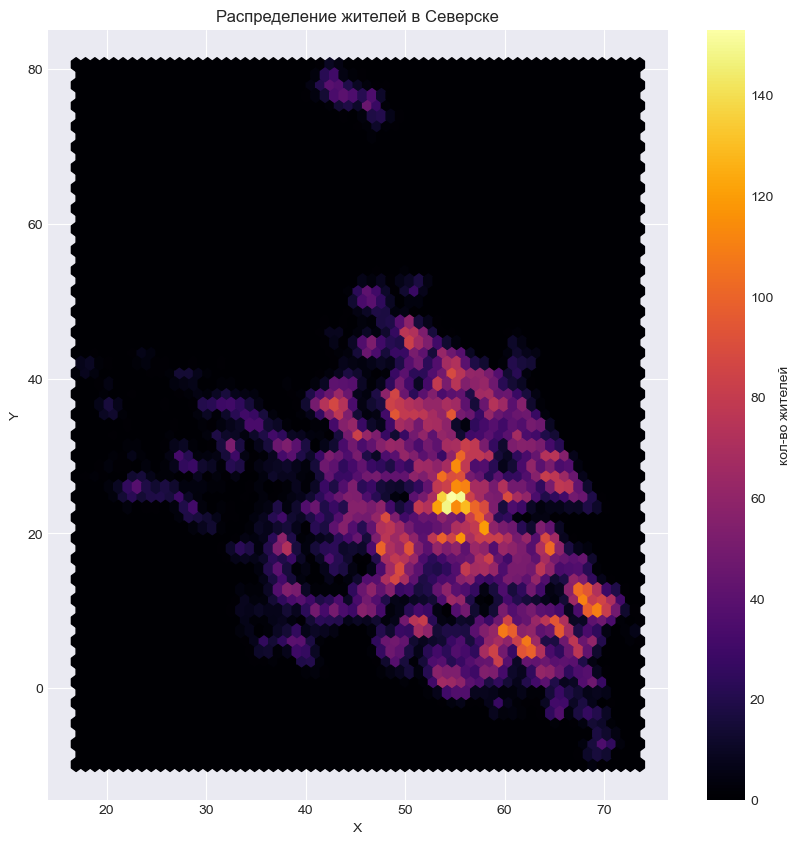

In [44]:
plt.figure(figsize=(10, 10))
plt.hexbin(df["x"], df["y"], gridsize=60, cmap="inferno")
plt.colorbar(label="кол-во жителей")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Распределение жителей в Северске")
plt.grid(True)

plt.show()

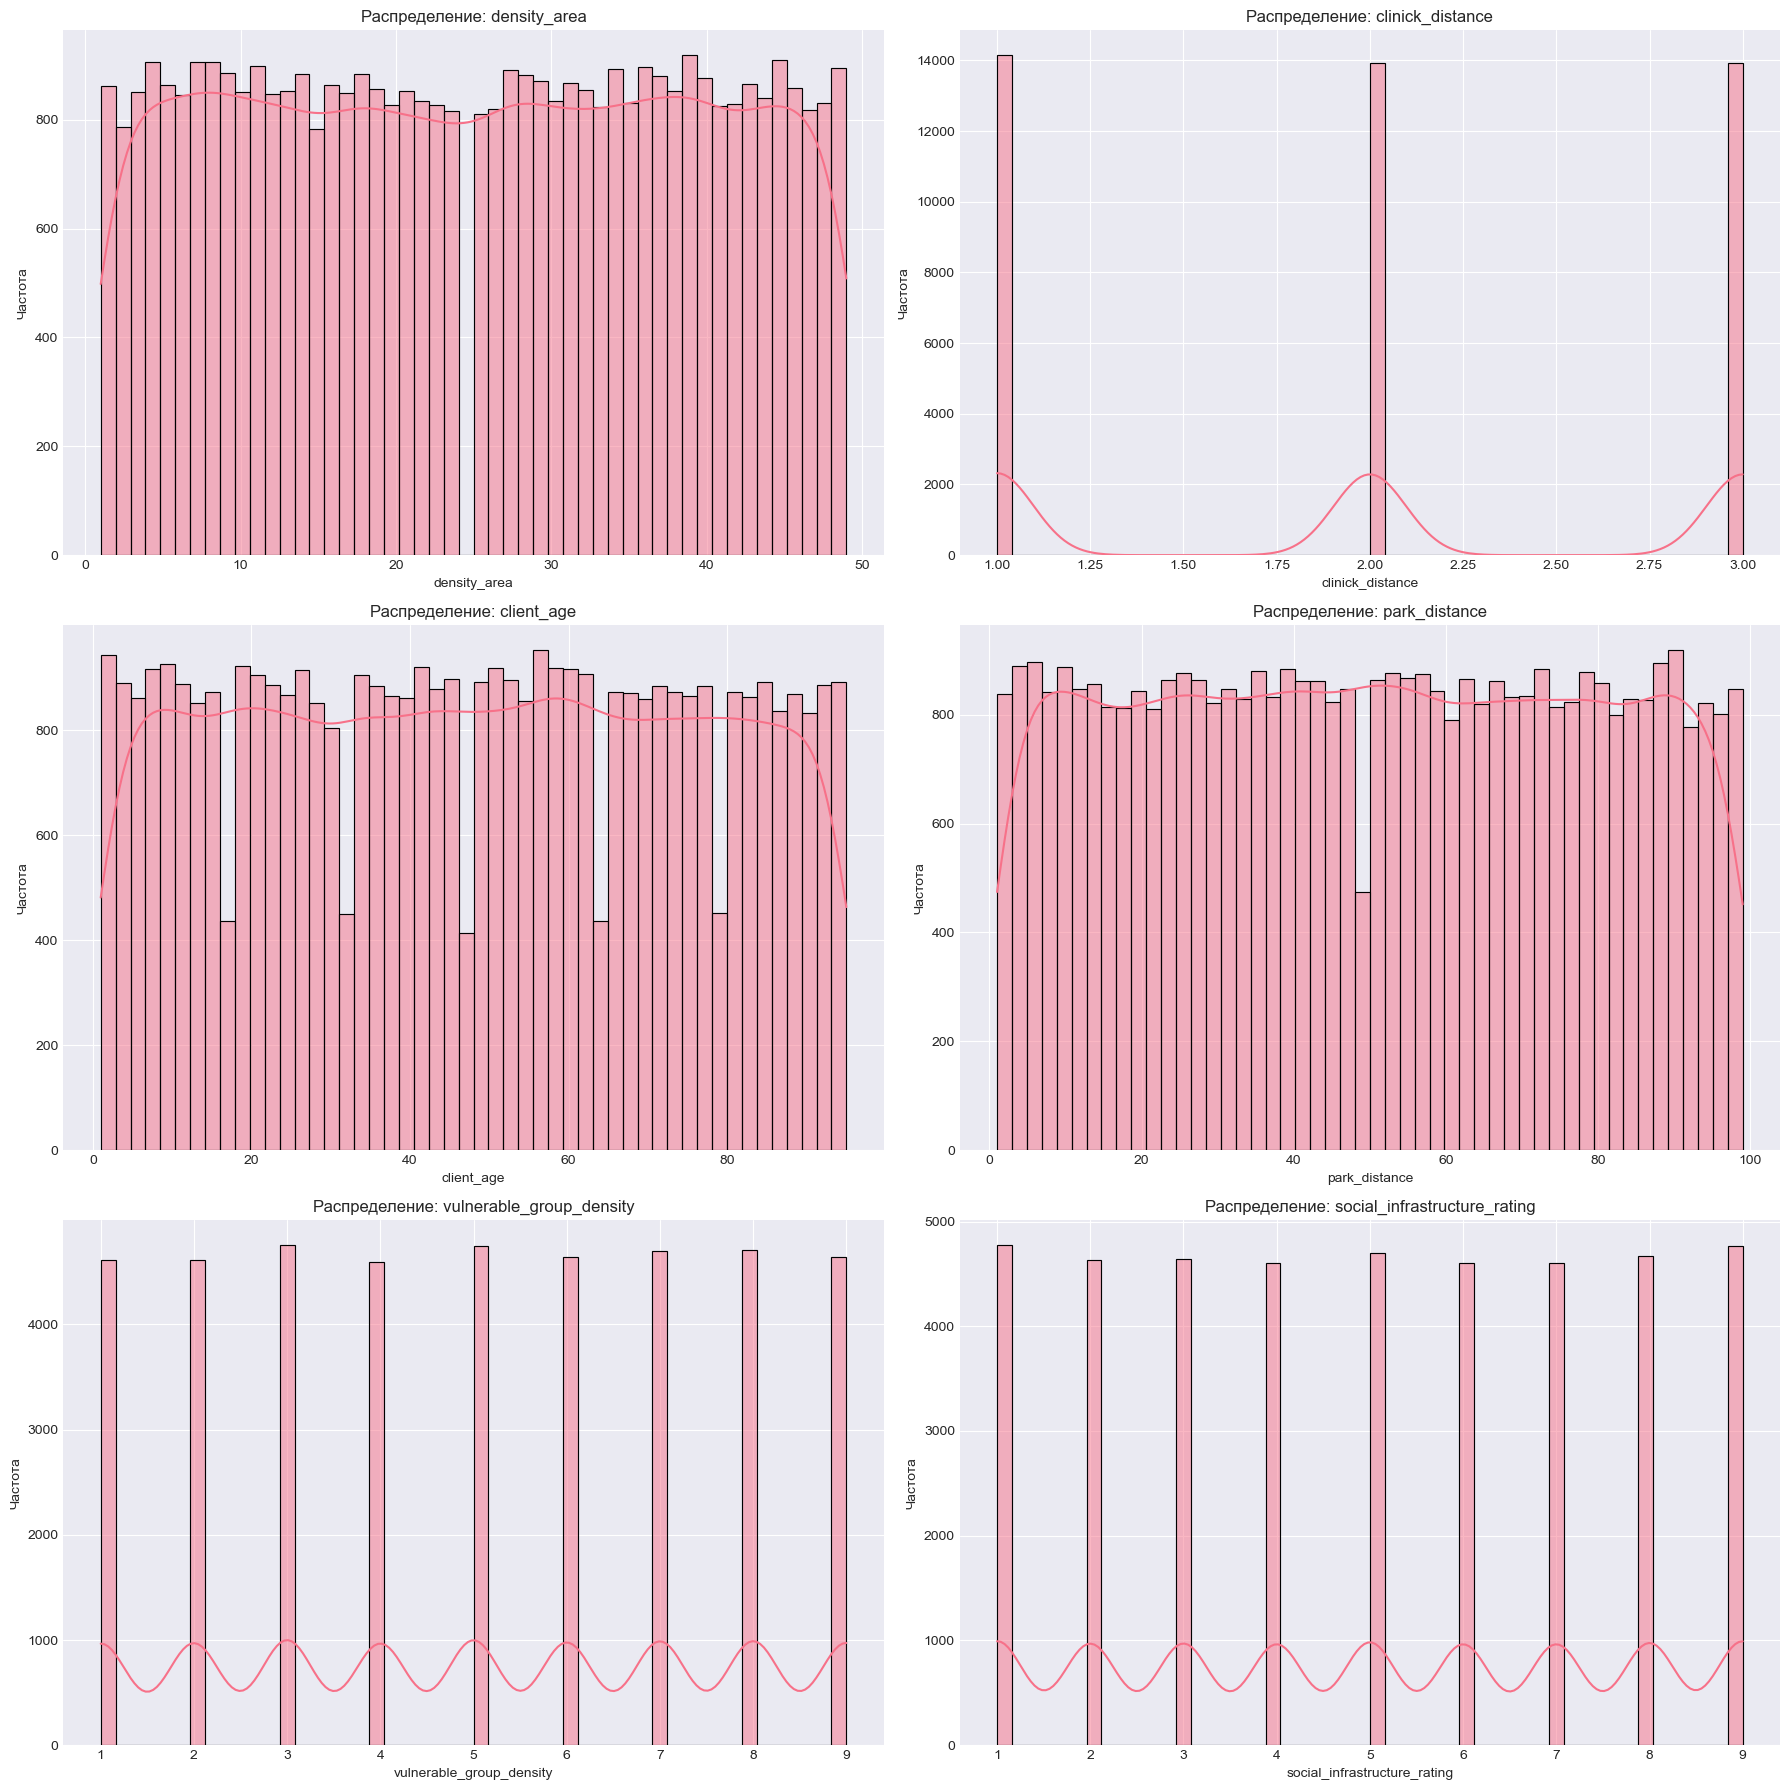

In [45]:
features = [
    "density_area",
    "clinick_distance",
    "client_age",
    "park_distance",
    "vulnerable_group_density",
    "social_infrastructure_rating"
]

plt.figure(figsize=(18, 18))

for i, feat in enumerate(features, start=1):
    plt.subplot(3, 2, i)
    sns.histplot(df[feat], kde=True, bins=50)
    plt.title(f"Распределение: {feat}")
    plt.xlabel(feat)
    plt.ylabel("Частота")

plt.tight_layout()
plt.show()

In [46]:
from scipy.stats import skew, kurtosis

for feature in features:
    skewness = skew(df[feature])
    print(f"Skewness ({feature}): {skewness:.2f}")

Skewness (density_area): 0.00
Skewness (clinick_distance): 0.01
Skewness (client_age): 0.00
Skewness (park_distance): 0.00
Skewness (vulnerable_group_density): -0.00
Skewness (social_infrastructure_rating): 0.00


In [47]:
df['clinick_distance'].value_counts()

clinick_distance
1    14142
3    13933
2    13931
Name: count, dtype: int64

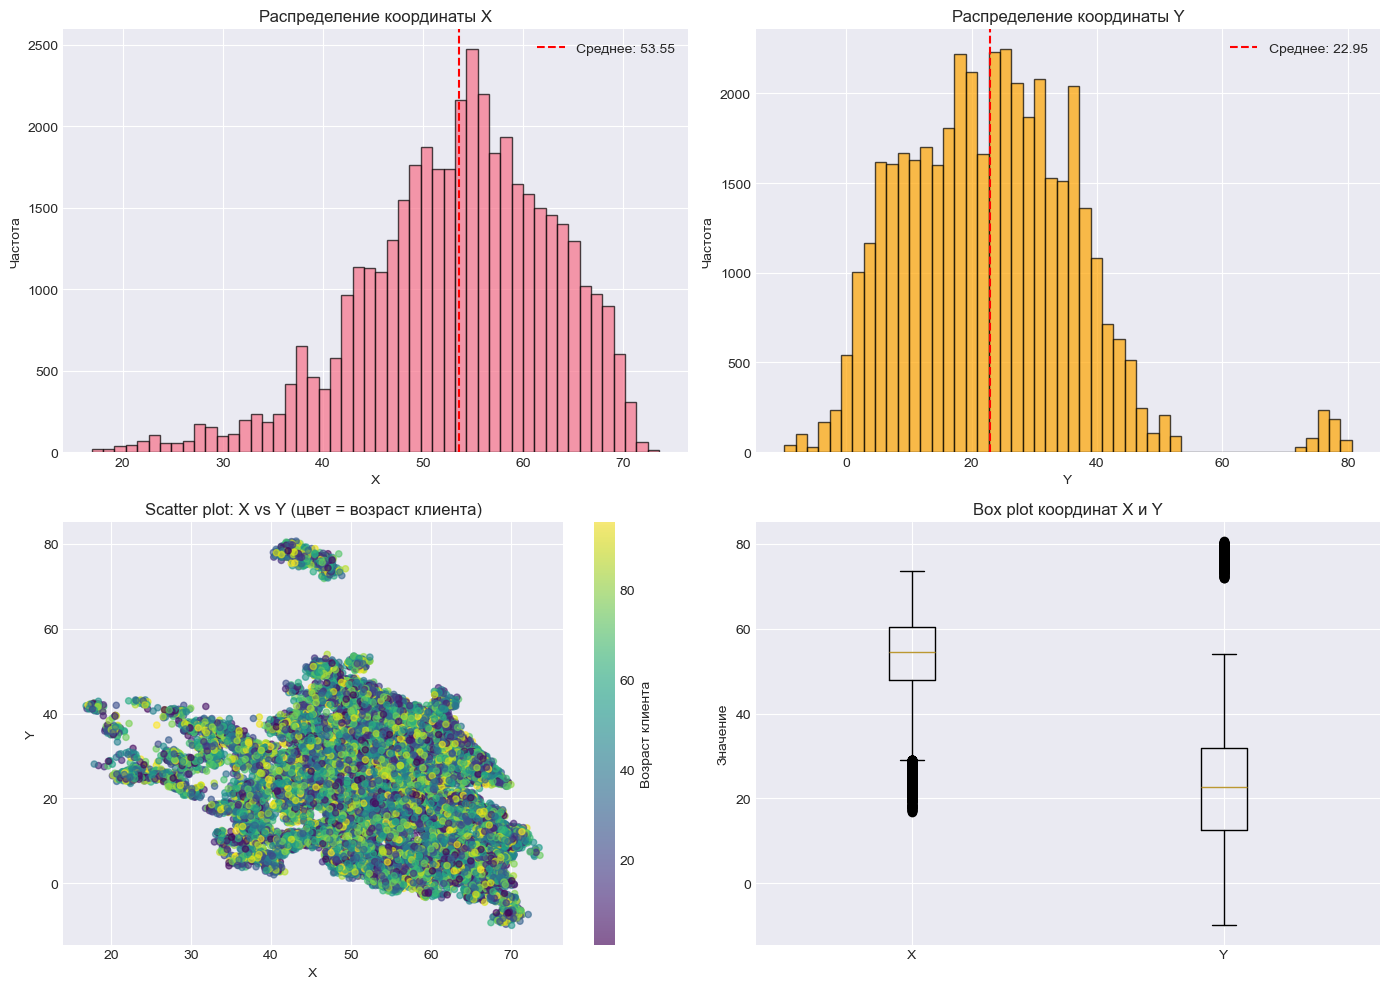

Анализ координат:
Диапазон X: [16.91, 73.58]
Диапазон Y: [-9.87, 80.60]
Среднее X: 53.55, Стандартное отклонение: 9.46
Среднее Y: 22.95, Стандартное отклонение: 13.77
Коэффициент корреляции X и Y: -0.330



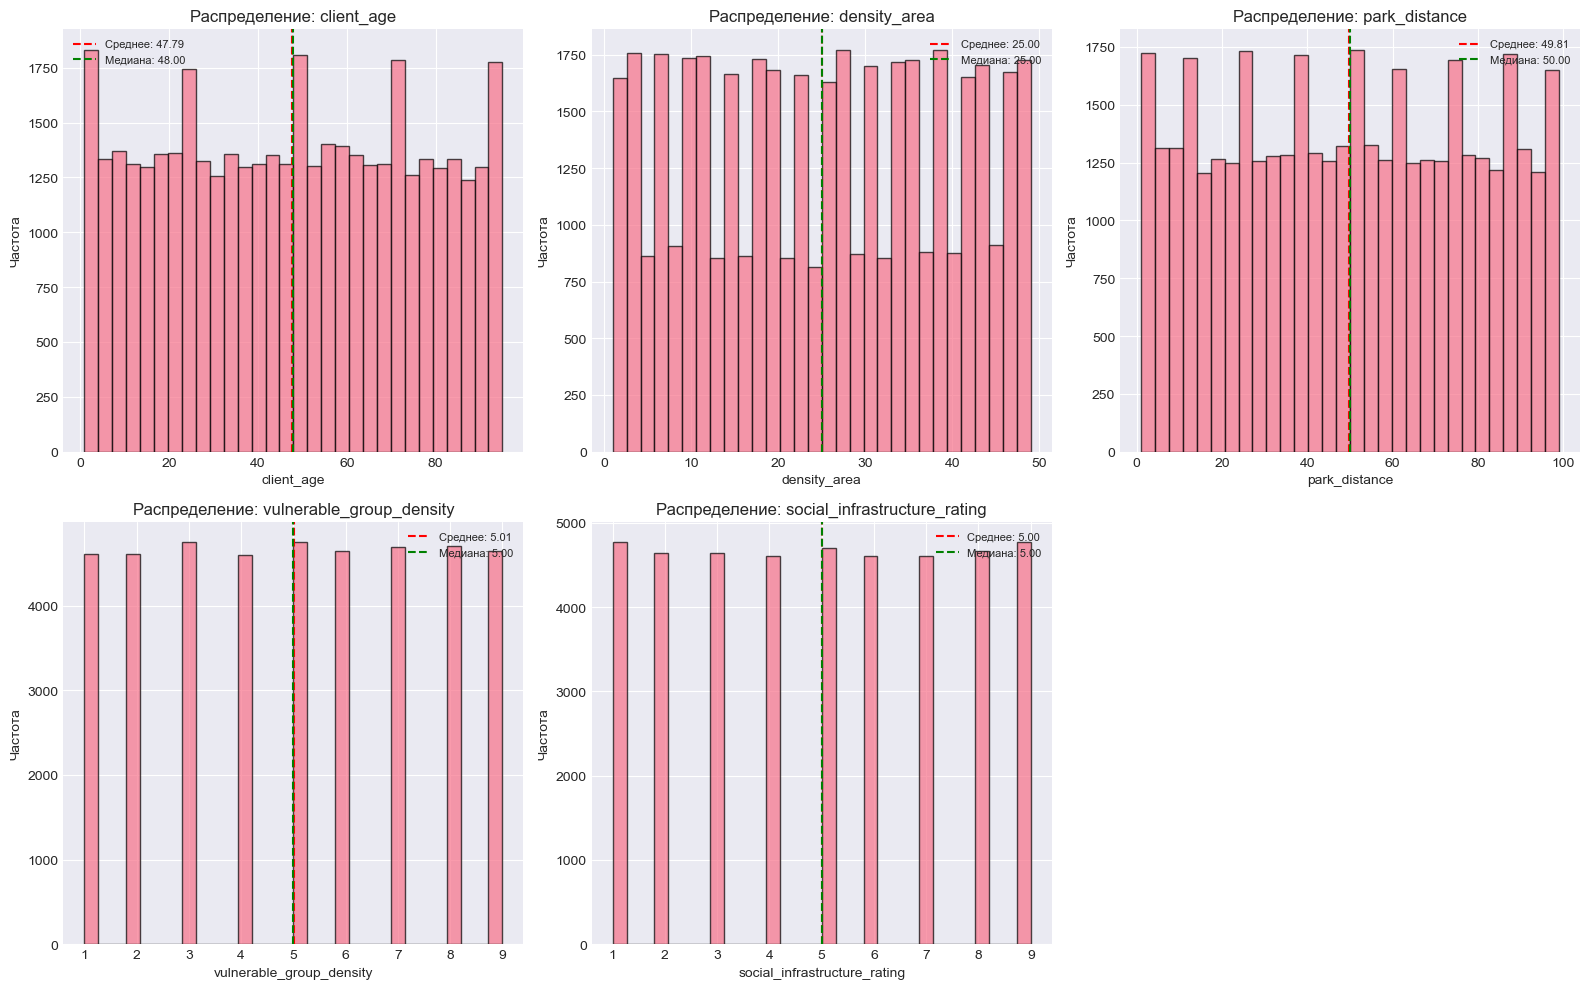

Уникальные значения clinick_distance:
[1, 2, 3]

Распределение значений:
  Расстояние 1: 14142 записей (33.7%)
  Расстояние 2: 13931 записей (33.2%)
  Расстояние 3: 13933 записей (33.2%)


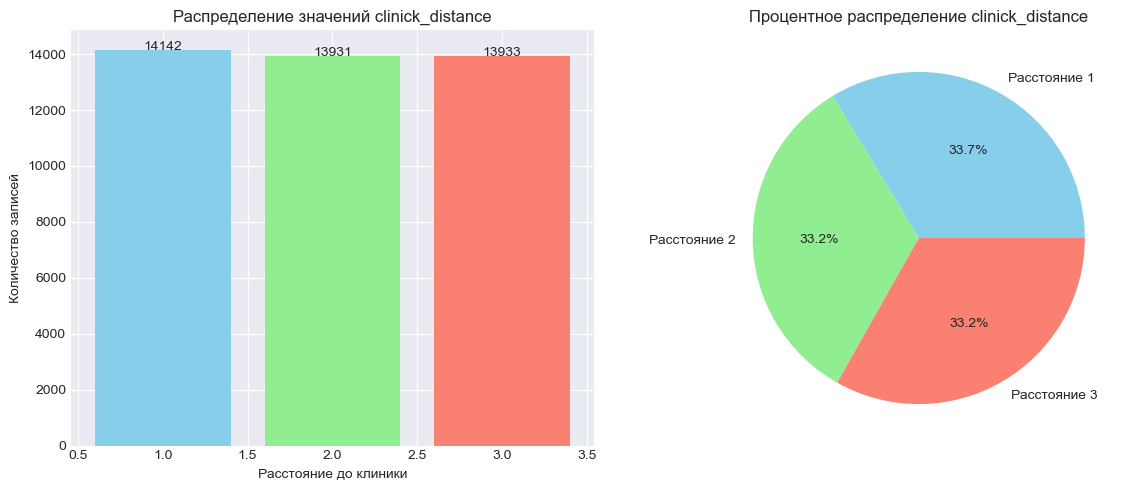

Пропущенные значения:
✓ Пропущенных значений нет

Поиск выбросов (метод IQR):
  client_age: выбросов нет
  density_area: выбросов нет
  park_distance: выбросов нет
  vulnerable_group_density: выбросов нет
  social_infrastructure_rating: выбросов нет
  x: 763 выбросов (1.8%)
    Границы: [29.08, 79.19]
  y: 593 выбросов (1.4%)
    Границы: [-16.31, 60.78]


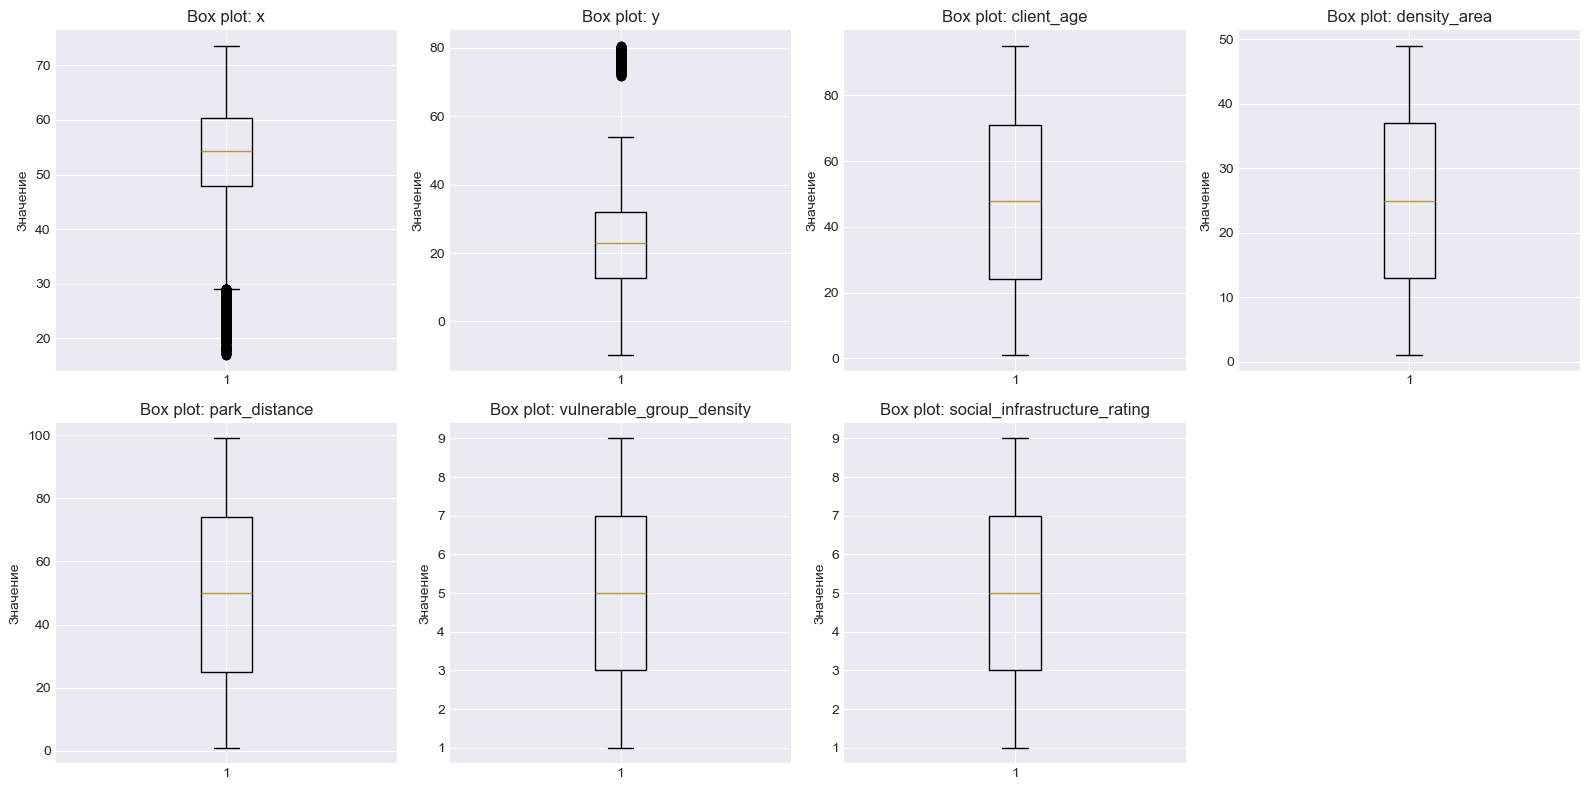

                     Признак  Min  Max   Среднее       Std              Рекомендация
                  client_age    1   95 47.793601 27.410523            StandardScaler
                density_area    1   49 24.995882 14.166947            StandardScaler
               park_distance    1   99 49.805004 28.539766            StandardScaler
    vulnerable_group_density    1    9  5.007951  2.577181 Не требуется (дискретный)
social_infrastructure_rating    1    9  5.000000  2.593639 Не требуется (дискретный)

1. ОБЩИЕ ХАРАКТЕРИСТИКИ:
   • Всего записей: 42006
   • Признаков: 8
   • Пропусков данных: нет
   • Типы данных: в основном числовые

2. КООРДИНАТЫ (X, Y):
   • X: диапазон [16.9, 73.6], среднее 53.5
   • Y: диапазон [-9.9, 80.6], среднее 22.9
   • Корреляция X и Y: -0.330 (слабая)


In [48]:
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Гистограммы
axes[0, 0].hist(df['x'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Распределение координаты X')
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].axvline(df['x'].mean(), color='red', linestyle='--', label=f'Среднее: {df["x"].mean():.2f}')
axes[0, 0].legend()

axes[0, 1].hist(df['y'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Распределение координаты Y')
axes[0, 1].set_xlabel('Y')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].axvline(df['y'].mean(), color='red', linestyle='--', label=f'Среднее: {df["y"].mean():.2f}')
axes[0, 1].legend()

scatter = axes[1, 0].scatter(df['x'], df['y'], c=df['client_age'], cmap='viridis', 
                             alpha=0.6, s=20)
axes[1, 0].set_title('Scatter plot: X vs Y (цвет = возраст клиента)')
axes[1, 0].set_xlabel('X')
axes[1, 0].set_ylabel('Y')
plt.colorbar(scatter, ax=axes[1, 0], label='Возраст клиента')

# Box plot
box_data = [df['x'], df['y']]
axes[1, 1].boxplot(box_data, labels=['X', 'Y'])
axes[1, 1].set_title('Box plot координат X и Y')
axes[1, 1].set_ylabel('Значение')

plt.tight_layout()
plt.show()

print("Анализ координат:")
print(f"Диапазон X: [{df['x'].min():.2f}, {df['x'].max():.2f}]")
print(f"Диапазон Y: [{df['y'].min():.2f}, {df['y'].max():.2f}]")
print(f"Среднее X: {df['x'].mean():.2f}, Стандартное отклонение: {df['x'].std():.2f}")
print(f"Среднее Y: {df['y'].mean():.2f}, Стандартное отклонение: {df['y'].std():.2f}")
print(f"Коэффициент корреляции X и Y: {df['x'].corr(df['y']):.3f}")
print()

# Выбор 6 числовых признаков (исключая x, y)
numerical_features = ['client_age', 'density_area', 'park_distance', 
                      'vulnerable_group_density', 'social_infrastructure_rating']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    # Гистограмма
    axes[i].hist(df[feature], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Распределение: {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Частота')
    
    axes[i].axvline(df[feature].mean(), color='red', linestyle='--', 
                    label=f'Среднее: {df[feature].mean():.2f}')
    axes[i].axvline(df[feature].median(), color='green', linestyle='--', 
                    label=f'Медиана: {df[feature].median():.2f}')
    axes[i].legend(fontsize=8)
    
    # Тест Шапиро-Уилка на нормальность (только для выборок разумного размера)
    if len(df) > 3 and len(df) < 5000:
        stat, p_value = stats.shapiro(df[feature].dropna())
        skewness = stats.skew(df[feature].dropna())
        kurtosis = stats.kurtosis(df[feature].dropna())
        
        print(f"\n{feature}:")
        print(f"  Тест Шапиро-Уилка: p-value = {p_value:.4f}")
        print(f"  Асимметрия (skewness): {skewness:.3f}")
        print(f"  Эксцесс (kurtosis): {kurtosis:.3f}")
        
        if p_value > 0.05:
            print(f"  Распределение НЕ отличается от нормального (p > 0.05)")
        else:
            print(f"  Распределение отличается от нормального (p < 0.05)")
        
        if abs(skewness) < 0.5:
            print(f"  Распределение примерно симметрично (|skewness| < 0.5)")
        elif skewness > 0:
            print(f"  Распределение скошено вправо (skewness > 0)")
        else:
            print(f"  Распределение скошено влево (skewness < 0)")

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

print("Уникальные значения clinick_distance:")
print(sorted(df['clinick_distance'].unique()))

print("\nРаспределение значений:")
distance_counts = df['clinick_distance'].value_counts().sort_index()
for distance, count in distance_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  Расстояние {distance}: {count} записей ({percentage:.1f}%)")

# Визуализация распределения
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Столбчатая диаграмма
axes[0].bar(distance_counts.index, distance_counts.values, 
            color=['skyblue', 'lightgreen', 'salmon'])
axes[0].set_title('Распределение значений clinick_distance')
axes[0].set_xlabel('Расстояние до клиники')
axes[0].set_ylabel('Количество записей')
for i, (dist, count) in enumerate(distance_counts.items()):
    axes[0].text(dist, count + 5, str(count), ha='center')

# Круговая диаграмма
axes[1].pie(distance_counts.values, labels=[f'Расстояние {d}' for d in distance_counts.index],
           autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])
axes[1].set_title('Процентное распределение clinick_distance')

plt.tight_layout()
plt.show()

# Проверка пропусков
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Пропусков': missing_values,
    'Процент': missing_percentage
})

print("Пропущенные значения:")
if missing_data['Пропусков'].sum() == 0:
    print("✓ Пропущенных значений нет")
else:
    print(missing_data[missing_data['Пропусков'] > 0])
print()

# Проверка выбросов с помощью IQR
print("Поиск выбросов (метод IQR):")
for feature in numerical_features + ['x', 'y']:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    
    if len(outliers) > 0:
        print(f"  {feature}: {len(outliers)} выбросов ({len(outliers)/len(df)*100:.1f}%)")
        print(f"    Границы: [{lower_bound:.2f}, {upper_bound:.2f}]")
    else:
        print(f"  {feature}: выбросов нет")

# Визуализация выбросов для числовых признаков
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, feature in enumerate(['x', 'y'] + numerical_features):
    axes[i].boxplot(df[feature].dropna())
    axes[i].set_title(f'Box plot: {feature}')
    axes[i].set_ylabel('Значение')

# Удаляем лишние subplots
for i in range(len(['x', 'y'] + numerical_features), 8):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Создаем таблицу со статистиками
scaling_info = []
for feature in numerical_features:
    feature_data = df[feature]
    
    # Определяем тип масштабирования
    if feature_data.nunique() < 10:  # Категориальный или дискретный
        scaling_type = "Не требуется (дискретный)"
    elif abs(stats.skew(feature_data.dropna())) > 1:  # Сильно скошенное распределение
        scaling_type = "RobustScaler или PowerTransformer"
    elif abs(stats.skew(feature_data.dropna())) > 0.5:  # Умеренно скошенное
        scaling_type = "StandardScaler с проверкой"
    else:  # Примерно нормальное
        scaling_type = "StandardScaler"
    
    scaling_info.append({
        'Признак': feature,
        'Min': feature_data.min(),
        'Max': feature_data.max(),
        'Среднее': feature_data.mean(),
        'Std': feature_data.std(),
        'Рекомендация': scaling_type
    })

scaling_df = pd.DataFrame(scaling_info)
print(scaling_df.to_string(index=False))
print()

print("1. ОБЩИЕ ХАРАКТЕРИСТИКИ:")
print(f"   • Всего записей: {len(df)}")
print(f"   • Признаков: {len(df.columns)}")
print(f"   • Пропусков данных: нет")
print(f"   • Типы данных: в основном числовые")

print("\n2. КООРДИНАТЫ (X, Y):")
print(f"   • X: диапазон [{df['x'].min():.1f}, {df['x'].max():.1f}], среднее {df['x'].mean():.1f}")
print(f"   • Y: диапазон [{df['y'].min():.1f}, {df['y'].max():.1f}], среднее {df['y'].mean():.1f}")
print(f"   • Корреляция X и Y: {df['x'].corr(df['y']):.3f} (слабая)")

In [56]:
import pandas as pd
import numpy as np
import torch
from scipy.spatial.distance import cdist

# ==============================
# SAFETY RESET
# ==============================
for name in ["centers"]:
    if name in globals():
        del globals()[name]

# ==============================
# CONFIG
# ==============================
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DTYPE = torch.float32
SEED = 42

ALPHA = 0.05
BETA = 0.02
GAMMA = 0.01
L = 1000

torch.manual_seed(SEED)
np.random.seed(SEED)

print(f"Using device: {DEVICE}")

Using device: cuda


In [57]:
df_clients = pd.read_csv("clinic-data.csv")

X = torch.tensor(
    df_clients[['x', 'y']].values,
    device=DEVICE,
    dtype=DTYPE
)

N = X.shape[0]
print(f"Loaded {N} clients")

Loaded 42006 clients


In [58]:
@torch.no_grad()
def hard_T(X, centers):
    dist = torch.cdist(X, centers)
    idx = torch.argmin(dist, dim=1)
    min_dist = dist[torch.arange(len(X)), idx]

    cost = ALPHA * min_dist + BETA * min_dist**2
    overload = torch.clamp(
        torch.bincount(idx, minlength=centers.shape[0]) - L,
        min=0
    )

    return cost.mean() + GAMMA * overload.sum()

In [59]:
def init_centers(X, K=250):
    idx = torch.randperm(len(X))[:K]
    return X[idx].clone()

centers = init_centers(X)
print("Initialized centers:", centers.shape)
print("Initial HARD T:", hard_T(X, centers).item())

Initialized centers: torch.Size([250, 2])


RuntimeError: CUDA error: CUBLAS_STATUS_NOT_INITIALIZED when calling `cublasCreate(handle)`

In [60]:
def stage_1_5_soft(
    X, centers,
    tau_start=0.2,
    tau_end=0.01,
    lr=0.1,
    max_iters=2000,
    print_every=50
):
    centers = centers.clone()

    for it in range(1, max_iters + 1):
        tau = tau_start * (tau_end / tau_start) ** (it / max_iters)

        dist = torch.cdist(X, centers) + 1e-8
        weights = torch.softmax(-dist / tau, dim=1)

        loads = weights.sum(dim=0)
        grad = torch.zeros_like(centers)

        for j in range(centers.shape[0]):
            w = weights[:, j:j+1]
            diffs = centers[j] - X
            d = dist[:, j:j+1]
            coeff = (ALPHA + 2 * BETA * d) / d
            grad[j] = (w * coeff * diffs).sum(dim=0) / (loads[j] + 1e-8)

        centers -= lr * grad

        if it % print_every == 0:
            print(f"[Stage 1.5] Iter {it} | tau={tau:.4f}")

    print("[Stage 1.5] DONE | HARD T:", hard_T(X, centers).item())
    return centers


In [61]:
def stage_2_softplus(
    X, centers,
    lr=0.05,
    max_iters=1000,
    print_every=100
):
    centers = centers.clone()

    for it in range(1, max_iters + 1):
        dist = torch.cdist(X, centers)
        weights = torch.softmax(-dist, dim=1)
        loads = weights.sum(dim=0)

        grad = torch.zeros_like(centers)

        for j in range(centers.shape[0]):
            w = weights[:, j:j+1]
            diffs = centers[j] - X
            d = dist[:, j:j+1]
            coeff = (ALPHA + 2 * BETA * d) / (d + 1e-8)

            overload = torch.nn.functional.softplus(loads[j] - L)
            grad[j] = (w * coeff * diffs).sum(dim=0)
            grad[j] += GAMMA * overload * grad[j]

        centers -= lr * grad / (loads[:, None] + 1e-8)

        if it % print_every == 0:
            print(f"[Stage 2] Iter {it}")

    print("[Stage 2] DONE | HARD T:", hard_T(X, centers).item())
    return centers

In [62]:
@torch.no_grad()
def stage_6pp(
    X, centers,
    delta=5e-5,
    boundary_eps=1e-3,
    max_iters=500,
    print_every=10
):
    best_T = hard_T(X, centers).item()
    print(f"[Stage 6++] Initial HARD T ≈ {best_T:.12f}")

    for it in range(1, max_iters + 1):
        dist = torch.cdist(X, centers)
        d_sorted, idx_sorted = torch.topk(dist, k=2, largest=False)

        d1, d2 = d_sorted[:, 0], d_sorted[:, 1]
        c1, c2 = idx_sorted[:, 0], idx_sorted[:, 1]

        boundary = torch.where((d2 - d1) < boundary_eps)[0]
        if len(boundary) < 10:
            print("[Stage 6++] Too few boundary points — stopping.")
            break

        involved = torch.unique(torch.cat([c1[boundary], c2[boundary]]))
        improved = False

        for dim in (0, 1):
            for direction in (-1, 1):
                trial = centers.clone()
                trial[involved, dim] += direction * delta
                T_new = hard_T(X, trial).item()

                if T_new < best_T:
                    centers = trial
                    best_T = T_new
                    improved = True
                    break
            if improved:
                break

        if it % print_every == 0 or improved:
            print(f"[Stage 6++] Iter {it} | BEST T ≈ {best_T:.12f}")

        if not improved:
            break

    print(f"[Stage 6++] FINISHED | BEST HARD T ≈ {best_T:.12f}")
    return centers

In [63]:
centers = stage_1_5_soft(X, centers)
centers = stage_2_softplus(X, centers)
centers = stage_6pp(X, centers)

RuntimeError: CUDA error: CUBLAS_STATUS_NOT_INITIALIZED when calling `cublasCreate(handle)`

In [64]:
final_T = hard_T(X, centers).item()
print(f"\nFINAL HARD T ≈ {final_T:.12f}")

pd.DataFrame(
    centers.cpu().numpy(),
    columns=["x", "y"]
).to_csv("final_solution.csv", index=False)

print("Saved to final_solution.csv")

RuntimeError: CUDA error: CUBLAS_STATUS_NOT_INITIALIZED when calling `cublasCreate(handle)`